In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dados = pd.read_csv('/content/BR-SANTAVERONICA-DB-01 - IPC.csv', sep =';',on_bad_lines='skip' )
dados.head()

,Talhao,Plantio,IdParcela,AreaParc,DataPlantio,DataColeta,Linha,Arvore,Fuste,Cap,Ht,Categoria1,Categoria2,Inclinacao,CoordenadaX,CoordenadaY,Observacao
0,T-6,P-6,IFC_12_001,400,01/05/2010,26/09/2018,1,1,1,57.5,NaN,NORMAL,NaN,0,-5397725337,-2049390493,NaN
1,T-6,P-6,IFC_12_008,400,01/05/2010,26/09/2018,2,5,1,58.0,NaN,NORMAL,NaN,0,-5397815827,-2049512442,NaN
2,T-6,P-6,IFC_12_008,400,01/05/2010,26/09/2018,2,6,1,40.4,NaN,NORMAL,NaN,0,-5397815827,-2049512442,NaN
3,T-6,P-6,IFC_12_008,400,01/05/2010,26/09/2018,3,1,1,56.5,NaN,NORMAL,NaN,0,-5397815827,-2049512442,NaN
4,T-6,P-6,IFC_12_008,400,01/05/2010,26/09/2018,3,2,1,49.2,NaN,NORMAL,NaN,0,-5397815827,-2049512442,NaN


# Organizando a base para a modelagem 

In [ ]:
dados.drop(columns=['Categoria2','Inclinacao','Observacao'], inplace = True)

In [ ]:
#Calculando variáveis para ajuste do Hipsométrico
dados['DAP'] = dados['Cap']/np.pi
dados['lnHt'] = np.log(dados['Ht'])
dados['1/dap'] = 1/dados['DAP']

In [ ]:
dados.head()

,Talhao,Plantio,IdParcela,AreaParc,DataPlantio,DataColeta,Linha,Arvore,Fuste,Cap,Ht,Categoria1,CoordenadaX,CoordenadaY,DAP,lnHt,1/dap
0,T-6,P-6,IFC_12_001,400,01/05/2010,26/09/2018,1,1,1,57.5,NaN,NORMAL,-5397725337,-2049390493,18.302818,NaN,0.054636
1,T-6,P-6,IFC_12_008,400,01/05/2010,26/09/2018,2,5,1,58.0,NaN,NORMAL,-5397815827,-2049512442,18.461973,NaN,0.054165
2,T-6,P-6,IFC_12_008,400,01/05/2010,26/09/2018,2,6,1,40.4,NaN,NORMAL,-5397815827,-2049512442,12.859719,NaN,0.077762
3,T-6,P-6,IFC_12_008,400,01/05/2010,26/09/2018,3,1,1,56.5,NaN,NORMAL,-5397815827,-2049512442,17.984509,NaN,0.055603
4,T-6,P-6,IFC_12_008,400,01/05/2010,26/09/2018,3,2,1,49.2,NaN,NORMAL,-5397815827,-2049512442,15.660846,NaN,0.063854


In [ ]:
#remover as 42 falhas do banco de dados
dados['Categoria1'].value_counts()

NORMAL             1449
DOMINANTE           164
FALHA                42
TORTUOSA             34
BIFURCADA ACIMA       3
MORTA                 2
BIFURCADA             2
Name: Categoria1, dtype: int64

In [ ]:
dados_ajuste = dados.loc[dados.Categoria1!='FALHA']
dados_ajuste['Categoria1'].value_counts()

NORMAL             1449
DOMINANTE           164
TORTUOSA             34
BIFURCADA ACIMA       3
MORTA                 2
BIFURCADA             2
Name: Categoria1, dtype: int64

In [ ]:
dados_treinamento_teste = dados_ajuste.dropna()

#Tendências

Gráfico de tendência 




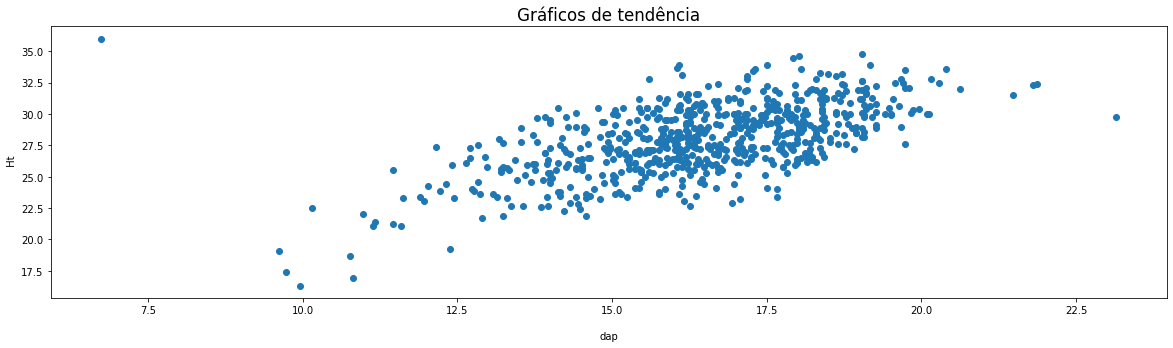

In [ ]:
fig, (ax1) = plt.subplots(1,1, figsize=(20,5))

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}

plt.rc('font', **font)

print('Gráfico de tendência ')
print('\n')

ax1.plot(dados_treinamento_teste['DAP'],dados_treinamento_teste['Ht'], 'o' )

ax1.set(title="Gráficos de tendência", xlabel="\ndap", ylabel=" Ht");


In [ ]:
#retirando o outlier
dados_treinamento_teste = dados_treinamento_teste[dados_treinamento_teste.DAP > 7.5]
dados_treinamento_teste = dados_treinamento_teste[dados_treinamento_teste.DAP < 21.0]

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


Gráfico de tendência 




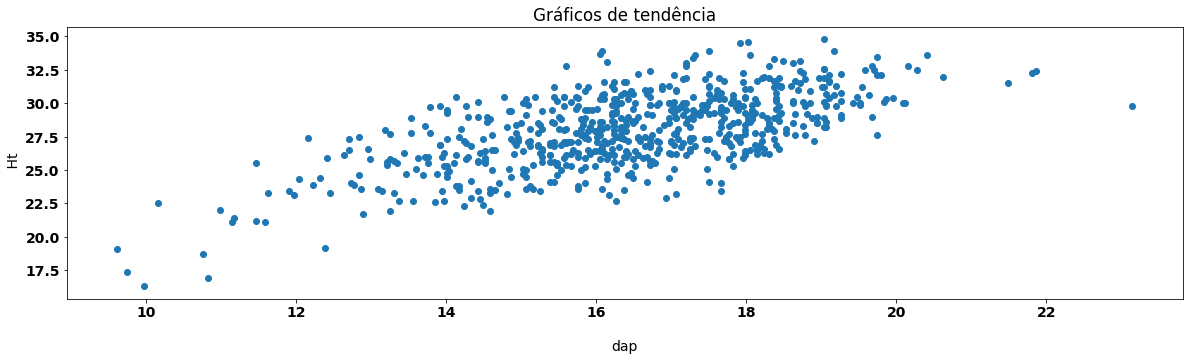

In [ ]:
fig, (ax1) = plt.subplots(1,1, figsize=(20,5))

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}

plt.rc('font', **font)

print('Gráfico de tendência ')
print('\n')

ax1.plot(dados_treinamento_teste['DAP'],dados_treinamento_teste['Ht'], 'o' )

ax1.set(title="Gráficos de tendência", xlabel="\ndap", ylabel=" Ht");

#Ajuste do Hipsométrico

In [ ]:
# Variáveis explicativas
ajuste = dados_treinamento_teste[['CoordenadaX','CoordenadaY',	'Categoria1','Fuste','1/dap','lnHt']]

In [ ]:
!pip install pycaret
!pip install Jinja2
!pip install markupsafe==2.0.1
!pip install --upgrade scikit-learn
!pip install scikit-learn==0.23.2
!pip3 uninstall statsmodels -y
!pip3 install statsmodels==0.10.0rc2 --pre --user

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 5.1 MB/s 
     |████████████████████████████████| 167 kB 54.1 MB/s 
     |████████████████████████████████| 2.0 MB 55.1 MB/s 
     |████████████████████████████████| 17.8 MB 513 kB/s 
     |████████████████████████████████| 1.3 MB 42.0 MB/s 
     |████████████████████████████████| 120 kB 61.4 MB/s 
     |████████████████████████████████| 56 kB 4.9 MB/s 
     |████████████████████████████████| 262 kB 49.6 MB/s 
     |████████████████████████████████| 6.8 MB 43.7 MB/s 
     |████████████████████████████████| 88 kB 8.4 MB/s 
     |████████████████████████████████| 1.7 MB 35.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.3 MB 43.8 MB/s 
     |████████████████████████████████| 6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.8 MB 1.5 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling

In [ ]:
from pycaret.regression import *

ModuleNotFoundError: ignored

In [ ]:
# Preparação dos dados antes do treinamento
s = setup(data = ajuste, target='lnHt')

,Description,Value
0,session_id,2323
1,Target,lnHt
2,Original Data,"(681, 6)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(476, 8)"


In [ ]:
best = compare_models(n_select = 3, sort='RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.0448,0.0035,0.0586,0.6515,0.0137,0.0136,0.059
rf,Random Forest Regressor,0.0467,0.0038,0.0608,0.6300,0.0142,0.0141,0.456
lightgbm,Light Gradient Boosting Machine,0.0472,0.0039,0.0618,0.6185,0.0145,0.0143,0.062
et,Extra Trees Regressor,0.0523,0.0047,0.0679,0.5345,0.0159,0.0158,0.526
ada,AdaBoost Regressor,0.0549,0.0049,0.0691,0.5140,0.0161,0.0166,0.054
knn,K Neighbors Regressor,0.0529,0.0056,0.0730,0.4809,0.0171,0.0161,0.060
lar,Least Angle Regression,0.0620,0.0061,0.0778,0.3843,0.0181,0.0187,0.013
br,Bayesian Ridge,0.0620,0.0061,0.0779,0.3843,0.0181,0.0188,0.013
omp,Orthogonal Matching Pursuit,0.0628,0.0062,0.0783,0.3766,0.0182,0.0190,0.012
dt,Decision Tree Regressor,0.0622,0.0064,0.0794,0.3562,0.0186,0.0188,0.017


In [ ]:
model = create_model('gbr', fold = 5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0462,0.0035,0.0588,0.6110,0.0136,0.0139
1,0.0411,0.0028,0.0533,0.6910,0.0123,0.0124
2,0.0424,0.0028,0.0532,0.6928,0.0123,0.0128
3,0.0529,0.0051,0.0711,0.6099,0.0169,0.0162
4,0.0454,0.0035,0.0594,0.7205,0.0138,0.0138
Mean,0.0456,0.0035,0.0592,0.6651,0.0138,0.0138
Std,0.0041,0.0008,0.0065,0.0458,0.0017,0.0013


In [ ]:
tuned_gbr = tune_model(model,fold = 5,optimize = 'RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0464,0.0035,0.0590,0.6085,0.0137,0.0139
1,0.0403,0.0027,0.0521,0.7046,0.0121,0.0121
2,0.0435,0.0031,0.0558,0.6628,0.0129,0.0131
3,0.0500,0.0047,0.0688,0.6350,0.0164,0.0154
4,0.0450,0.0034,0.0586,0.7275,0.0137,0.0137
Mean,0.0450,0.0035,0.0589,0.6677,0.0138,0.0136
Std,0.0032,0.0007,0.0056,0.0437,0.0015,0.0011


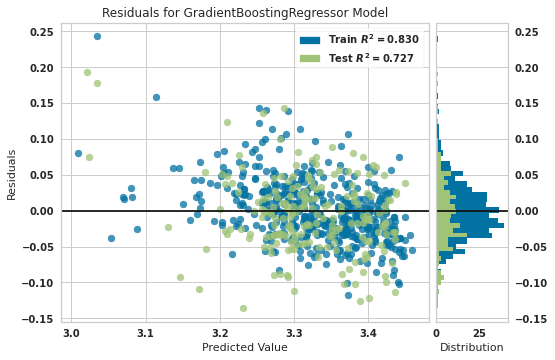

In [ ]:
evaluate_model(tuned_gbr)

In [ ]:
final_gbr = finalize_model(tuned_gbr)

In [ ]:
predict_model(final_gbr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0.0306,0.0015,0.0394,0.8497,0.0092,0.0092


,CoordenadaX,CoordenadaY,1/dap,Categoria1_BIFURCADA ACIMA,Categoria1_DOMINANTE,Categoria1_NORMAL,Categoria1_TORTUOSA,Fuste_1,lnHt,Label
0,-5.397368e+09,-2.050823e+09,0.069351,0.0,0.0,1.0,0.0,1.0,3.242592,3.202416
1,-5.397977e+08,-2.050289e+09,0.060649,0.0,0.0,1.0,0.0,1.0,3.349904,3.313530
2,-5.397893e+09,-2.049390e+09,0.087266,0.0,0.0,1.0,0.0,1.0,3.238678,3.207771
3,-5.397530e+09,-2.051046e+09,0.057963,0.0,0.0,1.0,0.0,1.0,3.273364,3.271583
4,-5.397222e+09,-2.050490e+09,0.056605,0.0,0.0,1.0,0.0,1.0,3.427515,3.395736
...,...,...,...,...,...,...,...,...,...,...
200,-5.397765e+09,-2.051080e+09,0.054259,0.0,1.0,0.0,0.0,1.0,3.280911,3.325804
201,-5.397497e+09,-2.050321e+09,0.067128,0.0,0.0,1.0,0.0,1.0,3.299534,3.266053
202,-5.397222e+09,-2.050333e+09,0.058178,0.0,0.0,1.0,0.0,1.0,3.384390,3.372059
203,-5.397811e+09,-2.051986e+09,0.057224,0.0,0.0,1.0,0.0,1.0,3.394508,3.373747


In [ ]:
predicao_final = predict_model(final_gbr, data=dados_ajuste)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0,0,0,0,0,0


In [ ]:
predicao_final

,Talhao,Plantio,IdParcela,AreaParc,DataPlantio,DataColeta,Linha,Arvore,Fuste,Cap,Ht,Categoria1,CoordenadaX,CoordenadaY,DAP,lnHt,1/dap,Label
0,T-6,P-6,IFC_12_001,400,01/05/2010,26/09/2018,1,1,1,57.5,NaN,NORMAL,-5397725337,-2049390493,18.302818,NaN,0.054636,3.415132
1,T-6,P-6,IFC_12_008,400,01/05/2010,26/09/2018,2,5,1,58.0,NaN,NORMAL,-5397815827,-2049512442,18.461973,NaN,0.054165,3.434850
2,T-6,P-6,IFC_12_008,400,01/05/2010,26/09/2018,2,6,1,40.4,NaN,NORMAL,-5397815827,-2049512442,12.859719,NaN,0.077762,3.258356
3,T-6,P-6,IFC_12_008,400,01/05/2010,26/09/2018,3,1,1,56.5,NaN,NORMAL,-5397815827,-2049512442,17.984509,NaN,0.055603,3.416534
4,T-6,P-6,IFC_12_008,400,01/05/2010,26/09/2018,3,2,1,49.2,NaN,NORMAL,-5397815827,-2049512442,15.660846,NaN,0.063854,3.415449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1691,T-8,P-8,IFC_12_032,400,01/06/2010,26/09/2018,4,8,1,43.9,25.3,NORMAL,-5397110174,-2050786515,13.973804,3.230804,0.071562,3.217278
1692,T-8,P-8,IFC_12_032,400,01/06/2010,26/09/2018,5,1,1,51.5,27.9,NORMAL,-5397110174,-2050786515,16.392959,3.328627,0.061002,3.324680
1693,T-8,P-8,IFC_12_032,400,01/06/2010,26/09/2018,5,2,1,54.5,29.3,NORMAL,-5397110174,-2050786515,17.347889,3.377588,0.057644,3.354349
1694,T-8,P-8,IFC_12_032,400,01/06/2010,26/09/2018,5,4,1,56.0,25.3,NORMAL,-5397110174,-2050786515,17.825354,3.230804,0.056100,3.337636


In [ ]:
predicao_final['lnHt']=predicao_final['lnHt'].fillna(0)

In [ ]:
# Inserindo as alturas estimadas
predicao_final['lnHtest'] = 0

for i,v in predicao_final['lnHt'].items():
    if v == 0:
      predicao_final['lnHtest'].loc[i] = predicao_final['Label'].loc[i]
    else:
      predicao_final['lnHtest'].loc[i] = predicao_final['lnHt'].loc[i]
  

In [ ]:
predicao_final['Htest'] = np.exp(predicao_final['lnHtest'])

In [ ]:
predicao_final.to_csv('altura_predito.csv')
# demais etapa no Excel 